# K-Means Clustering contd. and Advanced Clustering Methods - 1

## Content

- K-Means: Initialization and K-Means ++
- Limitations of K-Means
- K-Medoids
- Determining the right ‘K’
- Case Study: Customer Segmentation
- Heirarchical Clustering


***


## Initializing K-Means & K-Means ++

- Lloyd’s algorithm has **initialization as the first stage**.

- Here we pick ‘**K**’ points randomly as the centroids. This process of picking the points randomly as the centroids is called **Random Initialization**.

- But as briefly described in previous lecture, there is a problem with K-means clustering called **Initialization Sensitivity**. Initialization Sensitivity means the final clusters and centroids depend on how randomly we pick the points as centroids during the initialization.

<img src='https://drive.google.com/uc?id=1KGZH4R5spf-nbx975TVct8POa7i8m3Wm'>

#### Let's say we have two different results from K-Means CLustering of a given data

<img src='https://drive.google.com/uc?id=147m0UKlVGgyUN_KkU5d3giPPDcmlXOab'>

- When we look at the points in the above given 3 plots, the plot with the name “**Original points**” represents the points assigned to clusters manually.

- The plot with the name “**Optimal Clustering**” represents the perfect formation of clusters, and the plot “**Sub-optimal clustering**” represents another formation of clusters.

#### **Does Output 2 gives correct clusters of data points?**
No, it represents an incorrect formation of clusters

- So here the points are the same, and they remain in their positions, but the only difference lies in the clusters they are assigned to. **This kind of incorrect clustering happens due to random initializations of the centroids in K-Means clustering**.

- **Differences in initialization of the centroids results in differences in clustering**.

#### Let us look at below how one initialization has formed the clusters:

<img src='https://drive.google.com/uc?id=1pYWz0FbWsB1zXeGWrqIcYUPKbCs7rYDl'>

- Here the points are clustered perfectly.

- Whereas if there is a slight change in the initialization of the centroids, then for every iteration the clusters chang as shown below:

<img src='https://drive.google.com/uc?id=1S7fZFN8wNOgt0lTovVj_oFom8pawJljH'>

- This change in the clusterings of the points is just because of randomization in the initialization of the centroids.







### **How to deal with Initialization Strategy?**

#### **Method 1:**

Repeat the K-means approach with different initializations. Pick the best clustering based on smaller intra-cluster and large inter-cluster distances - **Dunn Index**.

<img src='https://drive.google.com/uc?id=1ob01Bg1PpByOurKOXATwix4FxVByNzWp'>

<img src='https://drive.google.com/uc?id=1lGGV_pyra6U2dsGpjB7Y0rvH7W4Oz59H'>

- It's not the best solution - It's a brute force!


#### **Method 2: K-Means ++**

Instead of using random initialization like in K-Means, here the random initialization is replaced by **smart initialization**.

**Initialization in K-Means ++**
1. Pick the first centroid randomly from the dataset ‘**D**’. Let it be ‘**$C_1$**’.
2. For each $x_i∈D$, create a distribution as follows:
  
  For each ‘$x_i$’, compute the square of its distance to the nearest centroid, i.e., for every $x_i → \text{distance}^2(x_i, \text{nearest centroid})$.
  
  Out of all the points, we have to keep the centroid ‘$C_1$’ aside and compute the square of the distances of the remaining points to ‘$C_1$’, i.e.,
$||x_i-C1||^2$.

<img src='https://drive.google.com/uc?id=1l-j4YHk7p3LDFkQdtybI6Yjiu4nEBBfm'>


- Pick a point from $D - {C_1}$ with probability proportional to ‘$d_i$’. It means **if ‘$d_i$’ is large for any point, then the chance of picking that point as the next centroid is large**.

- So the points that are far away from ‘$C_1$’ have a high probability of getting selected as the next centroid and it is appropriate. We are trying to
pick the points that are as far as possible from the centroids that are already picked up.

- We also can go with the deterministic way of picking the points as centroids, where the point with the highest value of $\text{distance}^2(x_i, C_1)$ is picked.

#### **Question: But why don't we go with deterministic way of picking point?**

<img src='https://drive.google.com/uc?id=1lMRNEPpwO6Ghseob07hbPb2jBqNLbeAC'>


We don’t do it deterministically because if there are **outliers** in our data at far distances, then their value of $\text{distance}^2(x_i, C_1)$ will be the highest and will be chosen as centroid, which could not be accepted.

- **K-Means ++** gets **affected by the outliers severely if a deterministic approach is followed**, whereas it gets **affected moderately by the outliers if a probabilistic approach is followed**. In a deterministic approach, outliers get selected as centroids. So it is better to go with the probabilistic approach to reduce the impact of the outliers.

- The probabilistic approach is not always guaranteed to avoid outliers as an extreme outlier has a higher probability of being picked up as a second centroid. It just minimizes the probability of picking the outliers slightly, but not significantly. If we are much concerned about outliers in the
data, it is best to use **Local Outlier Factor (LOF)** as a pre-processing step.

- The only difference between K-Means and K-Means ++ is the
initialization strategy. K-Means ++ is a probabilistic approach, and no one
uses the deterministic approach now. K-Means ++ is better than K-Means in
most of the cases.





***

## Failure Cases/Limitations of K-Means

**1.** K-Means doesn’t work well when the clusters are of
  
**a) Different Sizes**
  
- K-means tends to prefer creating clusters that are roughly of the same size. K-means tends to look more for the intra-cluster distances, than the inter-cluster distances.
  
- K-means splits the points into clusters of almost the same size. If the initial given clusters are of different sizes, then the clustering goes wrong.

- Moreover this problem arises when the initial clusters of different sizes are closer to each other. It doesn’t arise when these different sized clusters are far away from each other. Here the ‘**size**’ refers to the cardinal area in the space.

<img src='https://drive.google.com/uc?id=1XSLSIeMLhpDFgJD-caJQOlYnhX1uHHYn'>







**b) Different Densities**

- When we have clusters with high density, then K-means try to stretch those clusters and forms clusters of roughly the same size and less density.

<img src='https://drive.google.com/uc?id=1YGZKm4Fp1a_XhvjK1ZcGOY3jiWzrZmsB'>


**c) Non Globular (or) Non Convex shapes**
- Whenever we have the points in non globular shapes, then the K-means algorithm mostly creates clusters in a convex/globular shape, and most of the times such clustering goes wrong.

<img src='https://drive.google.com/uc?id=10QoxEL9MQ4TdZT8_0Si_lCyeQah1fALC'>




### **Overcoming the limitations of K-Means**

1. There is a **solution to the Differently Sized Clusters problem**.

- When we are given the points with different sized groups, one solution is to increase the number of clusters. After more clusters are formed, we need to combine the similar clusters which is not an easy task.

- Evaluating clustering is not an easy task as we do not have supervised output. We depend only on the intra-cluster and inter-cluster distances.

<img src='https://drive.google.com/uc?id=1LBRr9N0eLzogDNmLXZzYBbBKFG-qBcOO'>


2. Whenever we have the **data points with Different Densities**, then:

- If we increase the number of clusters, the smaller and denser clusters will remain the same, whereas the larger and sparse clusters get divided into multiple small sized clusters. It is again difficult to combine all these smaller clusters into a larger one.

<img src='https://drive.google.com/uc?id=1xBD9PXaBqfN67c2EAfAYlLJB9X7ExCAG'>

3. When we are given the **points in non-convex shape**, then:
- Increasing the number of clusters would split the nearby data points into smaller clusters as shown below:

<img src='https://drive.google.com/uc?id=1NQif4U2zuz7k8XaE49qcHZKFXtQs3xvF'>


- Increasing the number of clusters is always not the solution, but it makes sure that the points belonging to different clusters do not get combined together.

- If we want to use only K-means for our problem, then only we have to go with these steps. Otherwise, we can go for any other clustering technique.



#### **Question: Is there a way to make K-Means work for non-globular shaped clusters?**

- K-Means use Euclidean Distance as its distance metric.

<img src='https://drive.google.com/uc?id=17os5R_2C7SS4s0UlkULY_C-x27E78c-X'>

- If we can use any other distance metric that helps it detect non-globular shapes, then there's a possibility that it will detect non-globular shapes well.

<img src='https://drive.google.com/uc?id=1rWw5MYwpI1djlhkAv2pbf_KicB1FrWPU'>

<img src='https://drive.google.com/uc?id=1lJBwKXljngXxSbFpTsf07ezbK7CmSJ2x'>






***

## K-Medoids

One of the basic problems with the classical K-Means or K-Means++ is the **centroids $C_1, C_2, C_3, …., C_k$ that are obtained may not be interpretable**.

- For **example**, let us say we have **Customers' Reviews data from Amazon**, which is basically text data. In this dataset, ‘$x_i$’ is represented by a review text converted into vector form using, let's say, a simple Bag-of-Words encoding.

- The centroids $C_1, C_2, C_3, …., C_k$ are computed using the mean points.

- In **text-to-vector form notation**, each of the coordinates represent the features and as the coordinates of these centroids are computed by taking the average of the corresponding coordinates of various points, these **centroids are not interpretable**.

<img src='https://drive.google.com/uc?id=1escqIxDVe1fblLd7WfMIFfAU3D_Q4T9g'>

#### **Question: What if we want our cluster centroids to be interpretable?**

- We can use the nearest data point from centroid's values to represent the cluster.

<img src='https://drive.google.com/uc?id=17g51xgzV_DzyJMJGzBn4KR7OBwbFQ4wL'>

But there is a problem associated with this solution

- The nearest data point to the mean centroid **may not represent the whole cluster**, as it may be far from other points within the same cluster.

<img src='https://drive.google.com/uc?id=16D0ilPv-v8PPwzCN_rmmRFgrZVCD_sCQ' width='400'>

There is a computationally more expensive algorithm to overcome this problem - **K-Medoids**

<img src='https://drive.google.com/uc?id=1Ake3DrQMdPfU293k9Vfjw6GuudaOKLiY' width='400'>

- A **Medoid is basically a centroid that belongs to the dataset '$D$'**.

- Instead of giving the centroids $C_j$’s that are computed using the mean, if a data point $x_j∈D$ is given as the first centroid, we can read this review and understand. The data point ‘$x_j$’ is more interpretable than ‘$C_j$’.

- If each centroid is a data point in the dataset ‘$D$’, i.e., $C_i = x_j∈D$, then the corresponding K-means is referred to as **K-Medoids**.

- In K-Medoids, we have the **actual data points as the centroids**, instead of the averages. It is a popular algorithm to interpret the centroids.



### **Partitioning Around Medoids (PAM)**

K-Medoids use **Partitioning Around Medoids (PAM)** Algorithm which is explained step-by-step as follows:

1. **Initialization**
  
  Same as KMeans++. Using the probabilistic method, we pick ‘**K**’ points from the dataset as Medoids.

2. **Assignment**

  We use the closest medoid technique, i.e., $x_i∈S_j$ if $\text{medoid}_j$ is the closest medoid to ‘$x_i$’.

  <img src='https://drive.google.com/uc?id=1FWGd6m80sfRzGZUngHxQrSfkGLzh5O0w'>

3. **Recompute/Update**

  In K-Medoids, for each medoid:

  a) Swap each medoid with a non medoid point.

  b) If the loss decreases after the swap, keep the swap. Otherwise undo the swap.

  The loss we want to minimize $= Σ_{i=1}^k Σ_{x∈S_i} ||x - m_j||^2$

  where $m_j$ → Medoid ‘j’

- For example, if we are working on **K(=2)** medoids,
  
  a) If $m_1 = x_1$, and $m_2 = x_6$, then loss $= L_1$

  b) After swap, $m_1 = x_2$, and $m_2 = x_6$. Compute the loss value. Let it be ‘$L_2$’.

- If $L_2 < L_1$, then keep $m_1 = x_2$, and $m_2 = x_6$. Else $m_1 = x_1$ and $m_2 = x_6$.

- Keep doing this for all the other pairs. If there are ‘n’ data points and ‘K’xmedoids, we have to perform this $nC_k$ times. Once the swap is successful, we have to go back to the assignment stage and fix these new values as the medoids.

- But we know the medoids are also the data points from the dataset. So $||x_i - m_j||^2$ is the distance square between ‘$x_i$’ and ‘$m_j$’. So if the distances between the points are given, then it becomes **Kernel matrix**. We also can minimize the loss using the kernel matrix.

<img src='https://drive.google.com/uc?id=1CtvUCot2w2kp6J_UvN2OCa4zLs3A1wrR'>

- So the K-medoids approach makes the centroids more interpretable and also allows kernelization. These are the advantages of using the K-medoids approach.

- The centroids obtained by computing the averages are not interpretable because the mean of the original vectors may not make any sense as we may have non-integer values in some cells and we cannot construct the actual central point in each cluster.

- Medoid based approaches ensure that the central point is always one amongst the original data points in the dataset and are easily interpretable.

- In the case of K Means, in which the centroid is computed by taking the mean of all the points in the cluster, which could make it completely uninterpretable. In K-medoids, we do not create any artificial points. The **PAM approach is computationally expensive** and **would not work with large datasets**.


***

## Determining the right ‘K’

- In K-Means, ‘**K’ is a hyperparameter** and it can be determined
through:

**a) Domain Knowledge**

- If our problem contains a fixed number of clusters/groups all the time, then ‘**K**’ will be determined using the domain knowledge.

**b) Elbow Method or Knee Method**

- The objective function of K-Means clustering is to minimize the loss and it is given as:

  $Σ_{i=1}^k Σx∈S_i ||x-C_i||^2$

  <img src='https://drive.google.com/uc?id=11XXHrfzljvQWz11JFUTKQJUbmqGQ5Fkb'>

- The value of ‘**K**’ that yields the **least value for loss** is considered to be the **optimal hyperparameter**.






***

## Case Study: E-Commerce Customer Segmentation

#### **How to design a well-targeted marketing campaign?**

Imagine you are a Data Scientist at Myntra

- **Goal** - Increasing the revenue by selling more to existing customers by modeling their sales and surfing behavior.
- **Subgoal** - Modeling user behaviour by segmenting customers - expenditure, discount, clicks, visits, etc.

**In other words, we have a problem of segmenting customers.**



### **Customer Segmentation**

- Customer segmentation is the method of distributing a customer base into collection of people based on mutual characteristics so organizations can market to group efficiently and competently.

#### For example:

- **Demographic Segmentation** based on gender, age, occupation, marital status, income

- **Behavioral Segmentation** based on actions or inactions, spending/consumption habits, feature use, session frequency, browsing history, average order value

- **Geographic Segmentation** based on country, state, city of residence, Specific towns or counties

- **Technographic Segmentation** based on technologies, software, mobile devices

- **Psychographic Segmentation** based on personal attitudes, values, interests, personality traits


### **Dataset - Simulated data of previous customers' surfing and purchase details**

The dataset used for this case study contains the following parameters:
- Number of clicks, visits
- Amount spent
- Amount of discount
- Days since registration and
- Profile information

In [ ]:
# https://drive.google.com/file/d/1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W/view?usp=sharing
id = "1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W"
print("https://drive.google.com/uc?export=download&id=" + id)

https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W


In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2022-06-12 07:29:39--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 108.177.97.100, 108.177.97.101, 108.177.97.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.97.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1opkq3f7uirpl2pfijsab93dtc5uln17/1655018925000/10306167880925931714/*/1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W?e=download [following]
--2022-06-12 07:29:40--  https://doc-10-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1opkq3f7uirpl2pfijsab93dtc5uln17/1655018925000/10306167880925931714/*/1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W?e=download
Resolving doc-10-64-docs.googleusercontent.com (doc-10-64-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to doc-10-64-docs.googleusercontent.com (doc-10-64-doc

In [ ]:
!head ./E-commerce.csv

ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
1476,130,65,213.90583071577163,31.600750627904915,233,235
1535,543,46,639.2230037736391,5.6891747173479414,228,170
1807,520,102,1157.4027626541078,844.3216058194998,247,409
1727,702,83,1195.903633609631,850.0417570033645,148,200
1324,221,84,180.75461615086704,64.2833000293408,243,259
1793,971,167,1700.9096451005262,1257.4171176204811,205,229
646,345,77,1314.029384121076,12.095727427593667,230,217
416,222,61,3869.409085656883,117.49933081401785,257,296
232,451,74,2598.1462935566806,103.64066379042382,65,102


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./E-commerce.csv')

df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [ ]:
## We do not need 5 decimal places, so we round it to 2 places instead.

df['amount_spent'].round(decimals=2)
df['amount_discount'].round(decimals=2)

0         31.60
1          5.69
2        844.32
3        850.04
4         64.28
         ...   
2495     373.41
2496     122.64
2497       0.00
2498      78.13
2499    1065.42
Name: amount_discount, Length: 2500, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


### **Visualizing the data in 2-D**

#### **Question: How can we see if there are any pairwise relations between all pairs of variables?**

- PairPlot

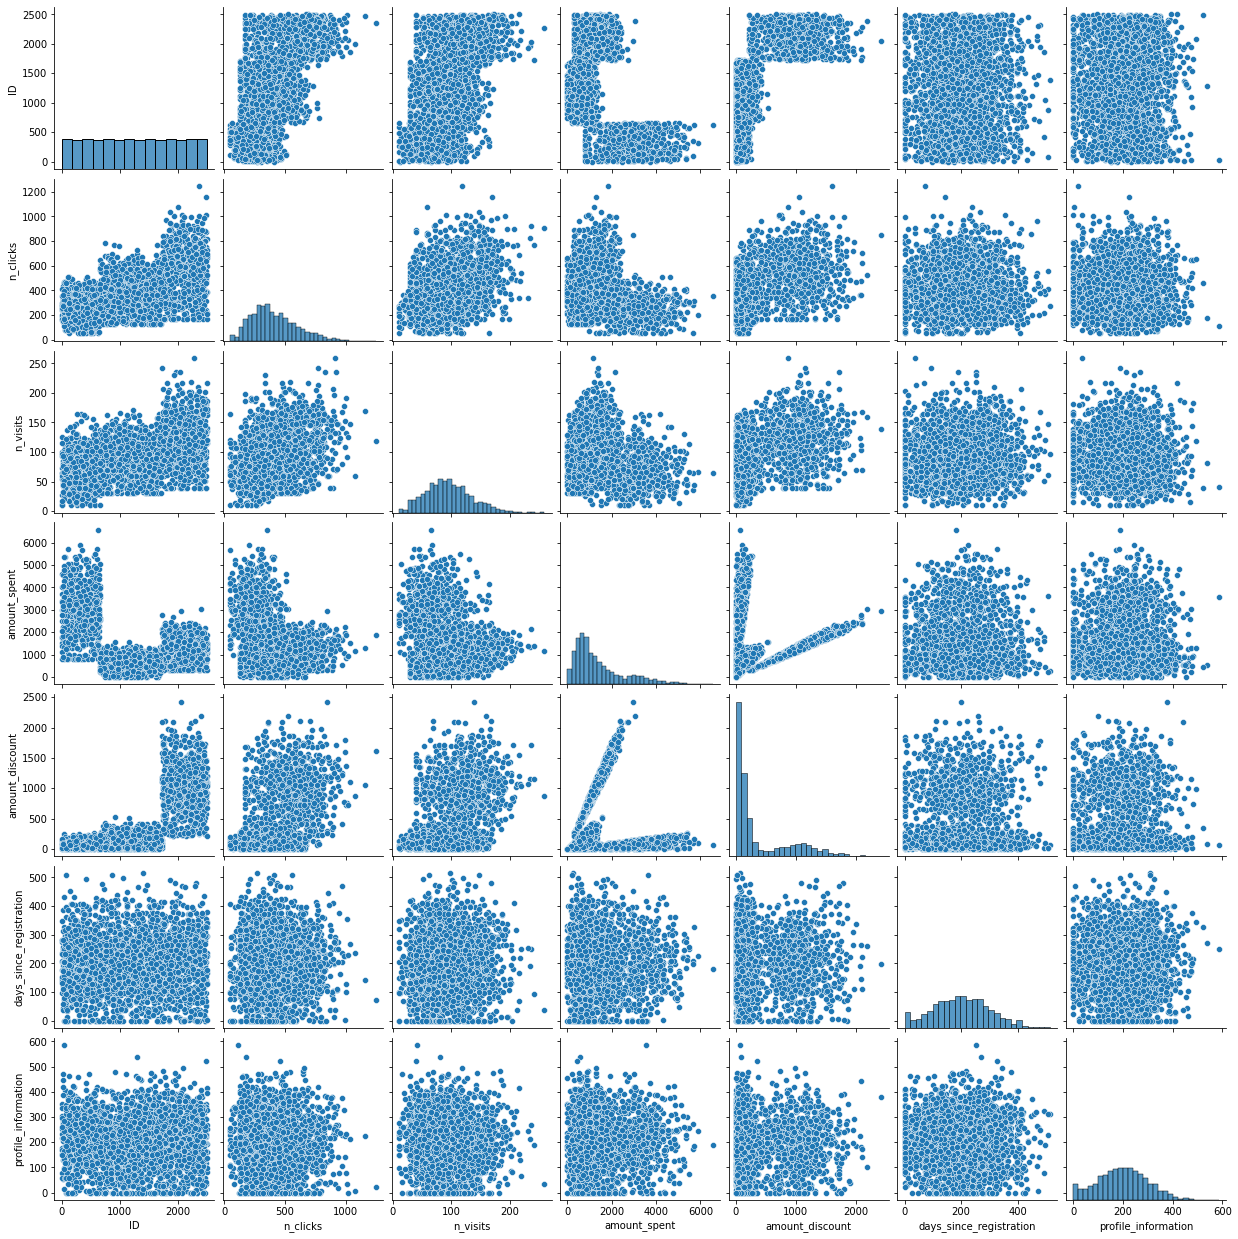

In [ ]:
sns.pairplot(df)

From pairplot, we can see:

- With so many variables(dimensions), it is easier to identify patterns or some data points are closer together.
- Assumption is that points that are closer together should have similar behaviour or characteristics.

#### **What could be the benefits of identifying patterns in this data?**
If we can clearly distinguish these groups (segregate customers), Myntra can:
- offer/show more discounted items to people who always buy discounted items,
- show quality products to people who buy expensive products or buy more often,
- identify segment of customer who explore a lot but don't end up buying, strategise to woo them.

### **Cleaning + Preprocessing**

**Some things to note about this data**

- CustomerID is just an identifier of the customer - its not a required parameter.
- No categorical variable, but we would have discarded that as well.
- No missing values.

In [ ]:
X=df.drop("ID",axis=1)
X

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,130,65,213.905831,31.600751,233,235
1,543,46,639.223004,5.689175,228,170
2,520,102,1157.402763,844.321606,247,409
3,702,83,1195.903634,850.041757,148,200
4,221,84,180.754616,64.283300,243,259
...,...,...,...,...,...,...
2495,804,120,502.643798,373.413462,363,107
2496,482,60,530.014805,122.639755,112,354
2497,375,111,0.000000,0.000000,84,454
2498,271,32,3190.499018,78.133067,111,215


In [ ]:
X.describe()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,408.68000,94.475600,1445.090745,388.508637,200.973600,201.040400
std,186.41409,38.866356,1167.663473,487.143968,99.136618,100.139213
min,50.00000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,274.75000,67.000000,609.618538,56.298615,130.000000,132.000000
50%,378.00000,92.000000,1036.189112,137.454623,200.000000,201.000000
75%,522.00000,119.000000,1949.270949,679.540536,268.000000,270.000000
max,1246.00000,259.000000,6567.402267,2428.406527,514.000000,585.000000


- Features are on different scales.

#### **Why should or should not we scale the variables for K-means?**

- K-Means is a distance-based algorithm. Because of that, it’s really important to perform feature scaling (normalize, standardize, or choose any other option in which the distance has some comparable meaning for all the columns).

- In this example, we use MinMaxScaler instead of StandardScaler, so as to transforming the feature values to fall within the bounded intervals (min and max), rather than making them to fall around mean as 0 with standard deviation as 1 (StandardScaler).

- MinMaxScaler is an excellent tool for this purpose. MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005].

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [ ]:
X.shape

(2500, 6)

In [ ]:
X

array([[0.06688963, 0.22088353, 0.03257084, 0.01301296, 0.45330739,
        0.4017094 ],
       [0.41220736, 0.14457831, 0.0973327 , 0.00234276, 0.44357977,
        0.29059829],
       [0.39297659, 0.36947791, 0.17623449, 0.34768545, 0.48054475,
        0.6991453 ],
       ...,
       [0.27173913, 0.40562249, 0.        , 0.        , 0.16342412,
        0.77606838],
       [0.18478261, 0.08835341, 0.48580837, 0.03217462, 0.21595331,
        0.36752137],
       [0.63879599, 0.45381526, 0.21235018, 0.43873046, 0.48249027,
        0.25470085]])

### **Clustering using Sklearn's implementation of Kmeans**

In [ ]:
from sklearn.cluster import KMeans

k = 4 ## arbitrary value
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [ ]:
## what are learned labels(cluster #)
y_pred

array([2, 2, 3, ..., 1, 0, 3], dtype=int32)

In [ ]:
##coordinates of the cluster centers
kmeans.cluster_centers_

array([[0.16755788, 0.23248031, 0.5137293 , 0.03438439, 0.37827271,
        0.36657722],
       [0.28584837, 0.31519317, 0.10727553, 0.06266808, 0.23934893,
        0.32979174],
       [0.27325468, 0.32461027, 0.11241494, 0.06775629, 0.56591177,
        0.34694553],
       [0.45336783, 0.4704339 , 0.21776527, 0.47129454, 0.39159396,
        0.33704573]])

In [ ]:
y_pred is kmeans.labels_

True

### **Visualizing Sklearn Clusters**


In [ ]:
clusters = pd.DataFrame(X, columns=df.drop("ID",axis=1).columns)
clusters['label'] = kmeans.labels_
clusters

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,label
0,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709,2
1,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598,2
2,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145,3
3,0.545151,0.293173,0.182097,0.350041,0.287938,0.341880,3
4,0.142977,0.297189,0.027523,0.026471,0.472763,0.442735,2
...,...,...,...,...,...,...,...
2495,0.630435,0.441767,0.076536,0.153769,0.706226,0.182906,2
2496,0.361204,0.200803,0.080704,0.050502,0.217899,0.605128,1
2497,0.271739,0.405622,0.000000,0.000000,0.163424,0.776068,1
2498,0.184783,0.088353,0.485808,0.032175,0.215953,0.367521,0


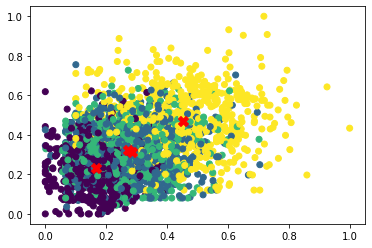

In [ ]:
def viz_clusters(kmeans):
    plt.scatter(clusters['n_clicks'], clusters['n_visits'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                color="red",
                marker="X",
                s=100)

viz_clusters(kmeans)

- There is some distinction between clusters, making a sense of it is a bit hard from this plot.

**A better alternative would be a line polar plot from plotly library - useful for visualizing multi-dimensional data**

- Group the customers by labels and calculate mean for all the features.
- Melt the data to have features on rows along with their corresponding mean values

In [ ]:
polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar, id_vars=["label"])
polar

,label,variable,value
0,0,n_clicks,0.167630
1,1,n_clicks,0.285828
2,2,n_clicks,0.273382
3,3,n_clicks,0.453368
4,0,n_visits,0.232054
5,1,n_visits,0.315516
6,2,n_visits,0.324739
7,3,n_visits,0.470434
8,0,amount_spent,0.513243
9,1,amount_spent,0.106992


In [ ]:
import plotly.express as px

fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=700,width=800)
fig.show()

#### **Insights**

- **Polar plot is read and interpreted radially** - values increase as we move away from the center showing the influence of a feature on that label.
- Many overlapping lines - <font color="green"> green(2) </font> and <font color="red"> red(1) </font> overlap on all the features except one.

Looking at this plot, we have different  customer segments:
- **Bargain shoppers**(`label 0`) - people who buy heavily discounted items. **Action:** show them more discounted items.
- **Inactive old users** (`label 1`) - people who have been a long time user of the app but have not shown much interest now. **Action:** start sending notifications, emails, etc - get them back on the platform.
- **New and inactive users** - Users who have recently joined but haven't bought much and are not that actively looking for items. Somewhat similar to `label 1`.
- **Premium shopper** (`label 3`) - Heavy spenders who like to buy items. **Action:** Show them more quality






### **Should we try with a different number of clusters?**

#### **Does number of clusters have to do with the performance of the model?**





In [ ]:
kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", random_state=0)
kmeans_iter3 = KMeans(n_clusters=8, init="random", n_init=1,
                     algorithm="full", random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', n_init=1, random_state=0)

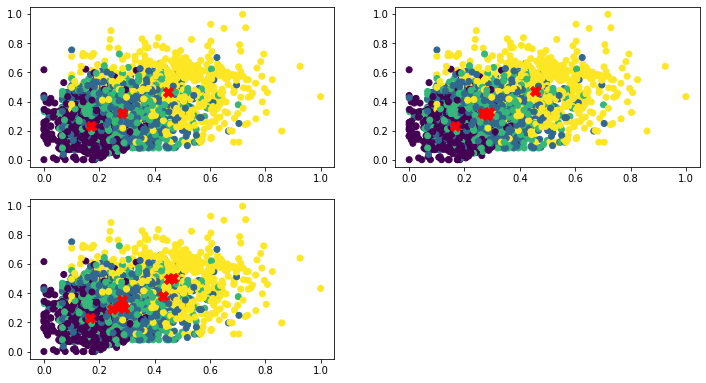

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(321)
viz_clusters(kmeans_iter1)

plt.subplot(322)
viz_clusters(kmeans_iter2)

plt.subplot(323)
viz_clusters(kmeans_iter3)

- So, Yes, the performance of K-Means depends on choosing the optimal number of clusters.

### **How to select the best model? - Inertia or WCSS**

**How many clusters to use for the customer clustering?**
- In supervised learning, one could try different hyperparameters and numbers of clusters, and could directly calculate some error metrics like the accuracy.
- The set of hyperparameters and number of clusters leading to the highest accuracy could then be used for the final model.
- But this is not possible for unsupervised learning, because of the lack of the ground truth values (labels).

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets.

But at least we can measure the distance between each instance and its centroid. This is the idea behind the **inertia metric**. The smaller the inertia value, the more coherent are the different clusters.

The K-means algorithm aims to choose centroids that minimise the **inertia**, or **within-cluster sum-of-squares** criterion:


<center>${\sum_{i=0}^N min(||x_i - C_j||^2)}$</center>

where, <br>N: No. of samples in dataset <br>
        $x_i$ : Data Sample i <br>
       $C_j$ : Centeroid of Cluster j



In [ ]:
kmeans_iter1.inertia_

280.16509626121075

In [ ]:
kmeans_iter2.inertia_

230.23795795912437

In [ ]:
kmeans_iter3.inertia_

195.24159155451287

**As we increase the number of clusters, inertia decreases.**

#### **So, does that mean we should keep increasing the number of clusters for better performance?**

- No, we cannot simply take the value of **K** that minimizes the inertia, since it keeps getting lower as we increase **K**.
- Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be.

#### **When will inertial reduce to zero?**
- When clusters is equal to number of instances.


**However, we can plot the inertia as a function of $K$ and analyze the resulting curve. This is known as the "Elbow-Method"**

### **Let's experiment with different number of clusters and plot their Inertia**

- Calculate the Within Cluster Sum of Squared Errors (WCSS) for different values of K
- Choose the K for which WCSS first starts to diminish.

**The steps can be summarized in the below steps:**
1. Compute K-Means clustering for different values of K by varying K from 1 to 10 clusters.
2. For each K, calculate the total within-cluster sum of square (WCSS).
3. Plot the curve of WCSS vs the number of clusters K.
4. The inflexion point(elbow) in the plot is generally considered to be an indicator of the appropriate number of clusters.


In [ ]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

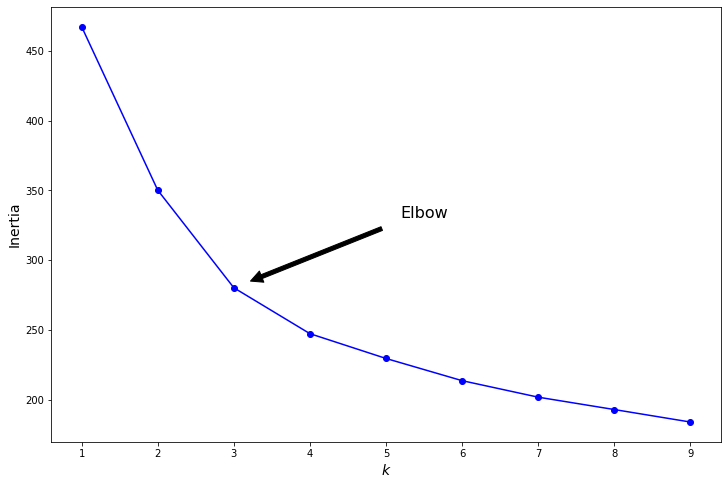

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

- Inflexion point is near 3 or 4 where the drops sharply and then slows down
- 3 would be a good choice, any lower value would be dramatic, while any higher value would not help much.

  **The elbow is found when the dataset becomes flat or linear after applying the cluster analysis algorithm.**

It's not a very precise method

- Elbow curve still relies on human interpretaion of where we see the slope changing.
- It gives a rough estimate only.

### **Silhouette Score**

- This is a more precise alternative to Inertia and Elbow curve!

- The silhouette score of a point **measures how close that point lies to its nearest neighbor points, across all clusters**. It provides information about clustering quality which can be used to determine whether further refinement by clustering should be performed on the current clustering.

- A more precise approach (but also more computationally expensive) is to use the silhouette score, which is the mean silhouette coefficient over all the instances.
- An instance’s silhouette coefficient is equal to `(b – a) / max(a, b)`,

 `a` is the the mean intra-cluster distance (i.e., mean distance to the other instances in the same cluster) and <br>
 `b` is the mean nearest-cluster distance (i.e., the mean distance to the instances of the next closest cluster; defined as the one that minimizes b, excluding the instance’s own cluster).

#### **Interpreting Silhouette scores**

- The silhouette coefficient can vary between –1 and +1.
- A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters,
- while a coefficient close to 0 means that it is close to a cluster boundary,
- and finally a coefficient close to –1 means that the instance may have been assigned to the wrong cluster.



#### **Example of calculation of Silhouette score:**

<img src='https://drive.google.com/uc?id=1_gbHq0TIM7q-Ej_0WhLI9XFq0BsH03_4'>

<img src='https://drive.google.com/uc?id=1flGlms38IgaZKPC7yPv02GlJi_a2B5Cn'>

<img src='https://drive.google.com/uc?id=17YCxpL8WrXdzKu4fQLFfoGa9G46Ykpvc'>

<img src='https://drive.google.com/uc?id=1r_NuLMoiTfrpgG0ypwvocVeHngg3G75g'>


- Now we can see why the best clustering will have a +1 score and what type of data will have 0 scores.

<img src='https://drive.google.com/uc?id=1u7T-qqRR8efkLRBWwyv7TCRkT-wv2AK_' width='500'>



In [ ]:
from sklearn.metrics import silhouette_score

## silhouette score for 4 clusters
silhouette_score(X, kmeans.labels_)

0.2108404992330738

In [ ]:
## plot for different values of K
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

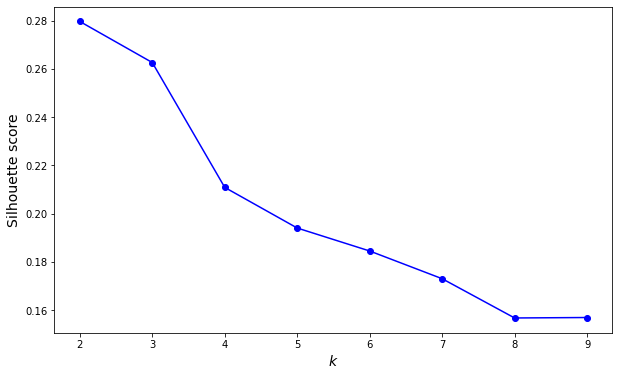

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

**Note:** Silhouette Coefficient is only defined if number of labels is `2 <= n_labels <= n_samples - 1`.

### **Final Clustering - Trying with 3 clusters**


In [ ]:
k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [ ]:
clusters=pd.DataFrame(X, columns=df.drop("ID",axis=1).columns)
clusters['label'] = kmeans.labels_
clusters

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,label
0,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709,0
1,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598,0
2,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145,1
3,0.545151,0.293173,0.182097,0.350041,0.287938,0.341880,1
4,0.142977,0.297189,0.027523,0.026471,0.472763,0.442735,0
...,...,...,...,...,...,...,...
2495,0.630435,0.441767,0.076536,0.153769,0.706226,0.182906,0
2496,0.361204,0.200803,0.080704,0.050502,0.217899,0.605128,0
2497,0.271739,0.405622,0.000000,0.000000,0.163424,0.776068,0
2498,0.184783,0.088353,0.485808,0.032175,0.215953,0.367521,2


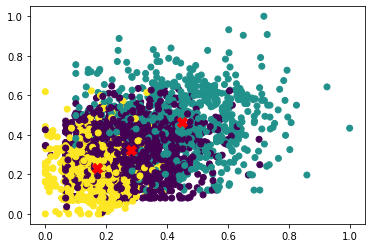

In [ ]:
viz_clusters(kmeans)

In [ ]:
polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar, id_vars=["label"])

In [ ]:
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=700,width=800)
fig.show()

***

## Hierarchical Clustering

- Hierarchical clustering (HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. <br>

Strategies for **Hierarchical Clustering** generally fall into two types:

#### **1. Agglomerative Approach (Bottom Up)**
- Initially each point is a cluster.
- Repeatedly combine the two "nearest" clusters into one as you move up the hierarchy.

<img src='https://drive.google.com/uc?id=1gbUnaNx-GU95SduinXZAV08ydNld3RcE'>

#### **2. Divisive Approach (Top Down)**
- Start with one cluster.
- Recursively split it into smaller clusters as you move down the hierarchy.

<img src='https://drive.google.com/uc?id=1riKB5e-XbE0BqGjtl9bYvmGwla6nLtnW'>


In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a **Dendrogram**.




### **Agglomerative Approach**

In this lecture we'll consider **Agglomerative Approach** where the key operation is to, repeatedly combine the two nearest clusters into a single larger cluster.

### **Algorithm:**

1. At first, each data point is treated as a cluster.

2. Repeat:
  1. Compute the distance between every cluster and every other cluster.

  2. Merge the two clusters that are closest together into a single cluster.

3. Until we have only one cluster.

<img src='https://drive.google.com/uc?id=1yDDd9G5R9DF-J6F4OiagKJtWOIkwvJj8'>

- This is a **Dendrogram**.

- Its a visual representation of the records and the hierarchy of clusters to which they belong (the hierarchial relationship).

- It is an inverted tree that describes the order in which factors are merged (bottom-up view) or clusters are broken up (top-down view).


***

## Closing Notes

- We'll continue with Agglomerative Clustering and cover it more in detail in the next lecture.

- We'll also see Advantages of Agglomerative Clustering over K-Means.

- We'll study another interesting and important clustering method - **DBSCAN**



***